In [560]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xgboost as xgb

In [561]:
# Define the time range for the dataset
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 31)
time_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Generate synthetic data for each metric
data = {
    'Timestamp': time_range
}

# Generate synthetic data for each metric
for metric in ['CPU_Usage', 'Memory_Consumption', 'Disk_IO', 'Network_Traffic', 
               'Container_Metrics']:
    # Generate random values for the metric
    metric_data = [random.uniform(0, 100) for _ in range(len(time_range))]
    data[metric] = metric_data

df = pd.DataFrame(data)

print(df)

              Timestamp  CPU_Usage  Memory_Consumption    Disk_IO  \
0   2024-01-01 00:00:00  44.291472           13.915177  53.338616   
1   2024-01-01 01:00:00  97.991913           97.154474  26.887649   
2   2024-01-01 02:00:00  31.376032           75.414152  36.098932   
3   2024-01-01 03:00:00  71.455074            0.590034   9.962359   
4   2024-01-01 04:00:00  10.398294           87.802102  77.810734   
..                  ...        ...                 ...        ...   
716 2024-01-30 20:00:00  36.771934           62.426435  93.547340   
717 2024-01-30 21:00:00  43.678816           43.940156  42.663006   
718 2024-01-30 22:00:00  22.523032            6.426986  39.465760   
719 2024-01-30 23:00:00  50.508065           19.696631  15.400995   
720 2024-01-31 00:00:00   4.251602           13.915927   3.097434   

     Network_Traffic  Container_Metrics  
0          49.429460          53.566587  
1          37.353581           0.094273  
2          91.789108          13.772965  
3  

/tmp/ipykernel_21878/458839595.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start=start_date, end=end_date, freq='H')


In [562]:
df.head()

,Timestamp,CPU_Usage,Memory_Consumption,Disk_IO,Network_Traffic,Container_Metrics
0,2024-01-01 00:00:00,44.291472,13.915177,53.338616,49.429460,53.566587
1,2024-01-01 01:00:00,97.991913,97.154474,26.887649,37.353581,0.094273
2,2024-01-01 02:00:00,31.376032,75.414152,36.098932,91.789108,13.772965
3,2024-01-01 03:00:00,71.455074,0.590034,9.962359,1.238449,96.001895
4,2024-01-01 04:00:00,10.398294,87.802102,77.810734,68.989945,6.839636


In [563]:
# Define the time range for the dataset
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 2, 29)
time_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Generate synthetic data for each metric
data = {
    'Timestamp': time_range
}

# Generate synthetic data for each metric
for metric in ['CPU_Usage', 'Memory_Consumption', 'Disk_IO', 'Network_Traffic', 'Container_Metrics']:
    # Generate random values for the metric
    metric_data = [random.uniform(0, 100) for _ in range(len(time_range))]
    data[metric] = metric_data

test_df = pd.DataFrame(data)

print(test_df)

              Timestamp  CPU_Usage  Memory_Consumption    Disk_IO  \
0   2024-02-01 00:00:00   4.613699           81.944832  76.111781   
1   2024-02-01 01:00:00  87.752991           83.902979  36.003332   
2   2024-02-01 02:00:00  57.920990           92.266933  80.491015   
3   2024-02-01 03:00:00  28.381816           85.560323  30.220297   
4   2024-02-01 04:00:00   3.768604           34.919918  64.663411   
..                  ...        ...                 ...        ...   
668 2024-02-28 20:00:00  79.007355           72.235882  23.920728   
669 2024-02-28 21:00:00  16.319641           42.449326  48.877792   
670 2024-02-28 22:00:00  37.375871           78.985839  49.471238   
671 2024-02-28 23:00:00  84.193591           70.296576  82.629051   
672 2024-02-29 00:00:00  46.528699           41.736146  95.835902   

     Network_Traffic  Container_Metrics  
0          94.764359          13.633254  
1          26.866973          59.610088  
2          62.819840          37.405414  
3  

/tmp/ipykernel_21878/3306983712.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start=start_date, end=end_date, freq='H')


In [564]:
test_df.tail()

,Timestamp,CPU_Usage,Memory_Consumption,Disk_IO,Network_Traffic,Container_Metrics
668,2024-02-28 20:00:00,79.007355,72.235882,23.920728,19.221694,79.761649
669,2024-02-28 21:00:00,16.319641,42.449326,48.877792,8.571125,98.692941
670,2024-02-28 22:00:00,37.375871,78.985839,49.471238,84.302801,8.683958
671,2024-02-28 23:00:00,84.193591,70.296576,82.629051,62.760516,72.969414
672,2024-02-29 00:00:00,46.528699,41.736146,95.835902,56.908423,78.357339


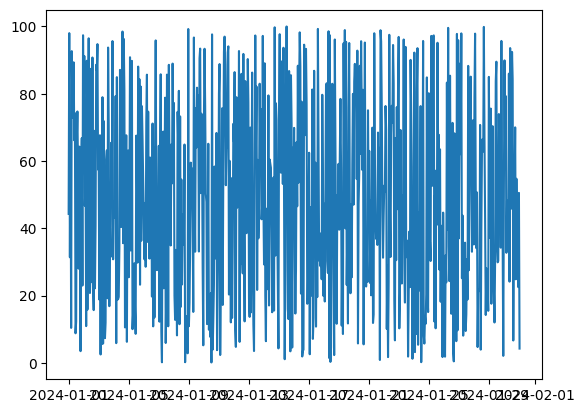

In [565]:
plt.plot(df['Timestamp'], df['CPU_Usage'])
plt.show()

In [566]:
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [567]:
def augmentedDickeyFullerTest(df, feature='point_value'):
    # adfuller test to check stationarity
    adf = adfuller(df[feature])
    pval = adf[1]
    print("P value", pval)

    return pval

In [568]:
def dropNullValues(df):
    # drop null values in the dataframe
    df = df.dropna()
    return df

In [569]:
def makeStationary(df, feature):
    # sample differencing
    df['shift'] = df[feature].shift()
    df['diff'] = (df[feature] - df['shift']) / df[feature].rolling(window=12).mean()
    df = dropNullValues(df)
    df[feature] = df['diff']
    return df

In [570]:
def graphPlot(pred, test, feature):
    # plotting test predictions vs original test set
    plt.plot_date(test['Timestamp'], test[feature], color='cornflowerblue', label='Original')
    plt.plot_date(test['Timestamp'], pred, color='firebrick', label='Predicted')
    plt.legend(loc='best')

    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(mdates.MO, mdates.TH), interval=1))  # Major ticks every Monday and Thursday
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show()

In [571]:
def arima_model(train, test, feature='point_value'):
    """
    arima(p,d,q)
    the p value is calculated from the Partial Autocorrelation plot for which data points exceed the confidence interval.
    the q value is calculated from the Autocorrelation plot for which data points exceed the confidence interval.
    they are initially 0. as the ARIMA could be AR model,MA model,or the ARIMA model depending on the params.
    """
    
    acf, cia = sm.tsa.acf(train[feature], alpha=0.05)
    pacf, cip = sm.tsa.pacf(train[feature], alpha=0.05)

    p = 0
    q = 0
    acf_absval = 0
    pacf_absval = 0

    for i in range(1, len(acf)):
        try:
            if abs(acf[i]) > cia[i][1] - cia[i][0]:
                if abs(acf[i]) > acf_absval:
                    p = i
                    acf_absval = abs(acf[i])

            if abs(pacf[i]) > cip[i][1] - cip[i][0]:
                if abs(pacf[i]) > pacf_absval:
                    q = i
                    pacf_absval = abs(pacf[i])
        except IndexError:
            continue

    model = ARIMA(train[feature], order=(p, 1, q))
    ARIMA_model = model.fit()

    start = len(train)
    end = len(test) + len(train) - 1

    pred = ARIMA_model.predict(start=start, end=end)

    actual = test[feature].values
    mape = np.mean(np.abs((actual - pred) / actual)) * 100

    return pred, mape

In [572]:
def create_features(df):
    # extracting features from the dataset
    df = df.copy()
    df = df.set_index('Timestamp')
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['month'] = df.index.month
    features = ['hour', 'dayofweek', 'month']
    df = df[features]
    return df

In [573]:
def xgb_regressor(train, test, feature='point_value'):
    """
    extracting features from the dataset and feeding into XGBoost algo
    """
    X_train = create_features(train)
    Y_train = train[feature]
    X_test = create_features(test)
    Y_test = test[feature]

    reg = xgb.XGBRegressor(n_estimators=1000)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    mape = np.mean(np.abs((Y_test - pred) / Y_test)) * 100
    
    return pred, mape

In [574]:
pval = augmentedDickeyFullerTest(df, 'Container_Metrics')
if pval>0.05:
    print("Non Stationary Data")
    df = makeStationary(df, 'Container_Metrics')

a_preds, a_mape = arima_model(df, test_df, 'Container_Metrics')
xg_preds, xg_mape = xgb_regressor(df, test_df, 'Container_Metrics')

if a_mape<xg_mape:
    print("Arima")
else:
    print("XGBoost")

P value 0.0
XGBoost


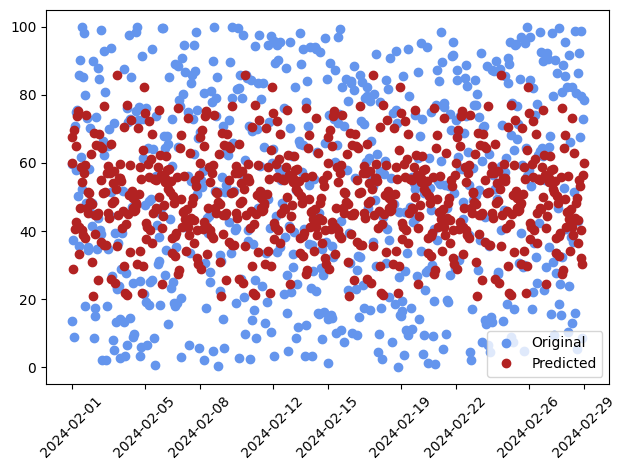

In [575]:
if a_mape<xg_mape:
    graphPlot(a_preds, test_df, 'Container_Metrics')
else:
    graphPlot(xg_preds, test_df, 'Container_Metrics')

In [576]:
def forecast_xgb_regressor(train, feature='point_value', start_date=datetime(2024, 3, 1), end_date=datetime(2024, 3, 31)):
    """
    Extracting features from the training dataset and feeding into XGBoost algo for forecasting
    """
    X_train = create_features(train)
    Y_train = train[feature]

    reg = xgb.XGBRegressor(n_estimators=1000)
    reg.fit(X_train, Y_train)
    
    # Generate features for the forecast period (March)
    march_df = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='H'), columns=["Timestamp"])
    forecast_features = create_features(march_df)
    
    # Make predictions for the forecast period
    pred = reg.predict(forecast_features)
    
    # Create a DataFrame with predicted values and the corresponding timestamps
    forecast_df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='H'), data=pred, columns=[feature])
    
    return forecast_df

In [577]:
def forecast_arima_model(train, feature='point_value', start_date=datetime(2024, 3, 1), end_date=datetime(2024, 3, 31)):
    """
    ARIMA(p,d,q) model for forecasting
    """
    # Determine the order of ARIMA model based on the autocorrelation and partial autocorrelation plots
    acf, cia = sm.tsa.acf(train[feature], alpha=0.05)
    pacf, cip = sm.tsa.pacf(train[feature], alpha=0.05)

    p = 0
    q = 0
    acf_absval = 0
    pacf_absval = 0

    for i in range(1, len(acf)):
        try:
            if abs(acf[i]) > cia[i][1] - cia[i][0]:
                if abs(acf[i]) > acf_absval:
                    p = i
                    acf_absval = abs(acf[i])

            if abs(pacf[i]) > cip[i][1] - cip[i][0]:
                if abs(pacf[i]) > pacf_absval:
                    q = i
                    pacf_absval = abs(pacf[i])
        except IndexError:
            continue

    # Fit ARIMA model to the training data
    model = ARIMA(train[feature], order=(p, 1, q))
    ARIMA_model = model.fit()

    # Generate timestamps for the forecast period (March)
    forecast_index = pd.date_range(start=start_date, end=end_date, freq='H')

    # Forecast for the future period (March)
    forecast = ARIMA_model.forecast(steps=len(forecast_index))

    # Create a DataFrame with predicted values and the corresponding timestamps
    forecast_df = pd.DataFrame(index=forecast_index, data=forecast, columns=[feature])

    return forecast_df

In [578]:
march_forecast = pd.DataFrame()
if a_mape<xg_mape:
    march_forecast = forecast_arima_model(pd.concat([df, test_df]), 'Container_Metrics')
    print("Arima")
else:
    march_forecast = forecast_xgb_regressor(pd.concat([df, test_df]), 'Container_Metrics')
    print("XGboost")

XGboost


/tmp/ipykernel_21878/752880778.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  march_df = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='H'), columns=["Timestamp"])
/tmp/ipykernel_21878/752880778.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='H'), data=pred, columns=[feature])


In [579]:
march_forecast

,Container_Metrics
2024-03-01 00:00:00,58.082703
2024-03-01 01:00:00,59.726360
2024-03-01 02:00:00,50.858486
2024-03-01 03:00:00,42.591461
2024-03-01 04:00:00,60.094299
...,...
2024-03-30 20:00:00,62.884407
2024-03-30 21:00:00,60.605404
2024-03-30 22:00:00,36.596920
2024-03-30 23:00:00,35.637955


In [586]:
def plot_forecast(df, test_df, forecast_df, feature='point_value'):
    plt.plot_date(df['Timestamp'], df[feature], color='cornflowerblue', label='Original')
    plt.plot_date(test_df['Timestamp'], test_df[feature], color='cornflowerblue', label='Original')
    plt.plot_date(forecast_df.index, forecast_df[feature], color='firebrick', label='Predicted')
    plt.legend(loc='best')

    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(mdates.MO, mdates.TH), interval=1))  # Major ticks every Monday and Thursday
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show()

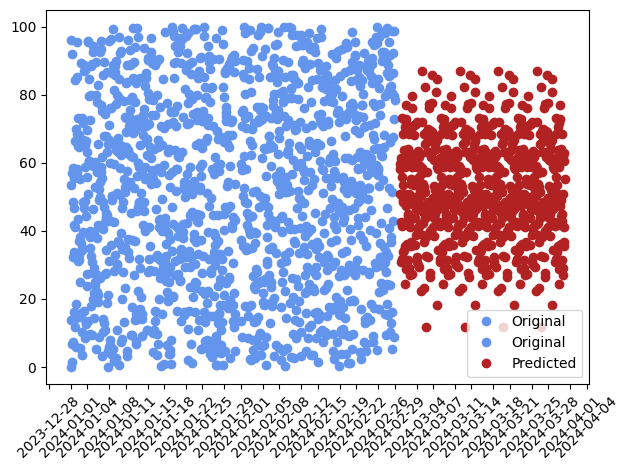

In [587]:
plot_forecast(df, test_df, march_forecast, 'Container_Metrics')